<a href="https://colab.research.google.com/github/Kushal-H-Choudhary/python/blob/main/Titanic_Passenger_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Passenger Survival Prediction**

---



**1.Problem Statement**

---



During the Titanic disaster, passenger survival depended on several factors such as age, gender, and passenger class.

The goal of this project is to develop a binary classification machine learning model that predicts whether a passenger survived (Yes/No) using historical passenger data. The project also aims to identify the most important factors that influenced survival.

**2. Objectives of the Project**

---


* Understand passenger survival patterns
* Perform basic data preprocessing
* Conduct minimal but meaningful EDA
* Build binary classification models
* Evaluate model performance
* Identify key survival-influencing features

In [ ]:
from google.colab import files
uploded=files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df.shape

(891, 12)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Handling missing values**

---



In [ ]:
num_cols=["Age"]
for col in num_cols:
  df[col]=df[col].fillna(df[col].median())
num_col1=["Embarked"]
for c in num_col1:
  df[c]=df[c].fillna(df[c].mode())
print(df)
if 'Cabin' in df.columns:
  df.drop(columns=['Cabin'],inplace=True)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

**Exploratory Data Analysis**

---



**Graph Survival count plot**

---



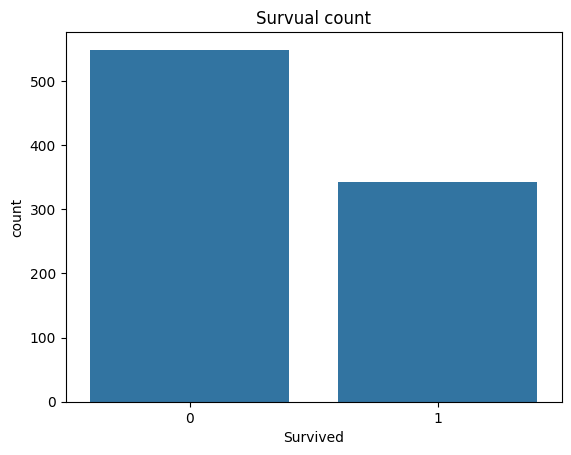

In [ ]:
#Exploratory Data Analysis
#Graph Survival count plot
import seaborn as sns
sns.countplot(x='Survived',data=df)
plt.title("Survual count")
plt.show()

**Graph Survival by Gender**

---



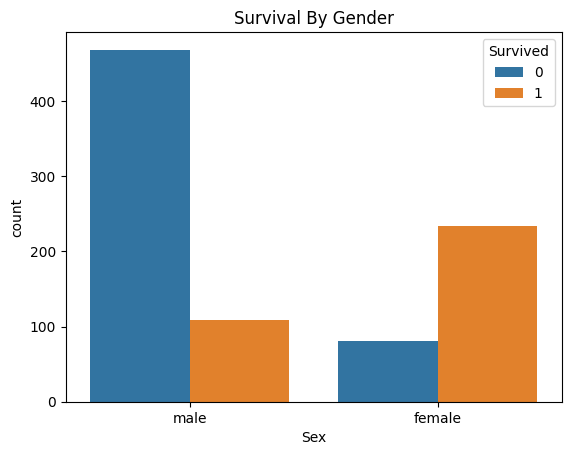

In [ ]:
#Graph Survival by Gender
sns.countplot(x='Sex',hue='Survived', data=df)
plt.title("Survival By Gender")
plt.show()

**Graph Survival by passenger class**

---



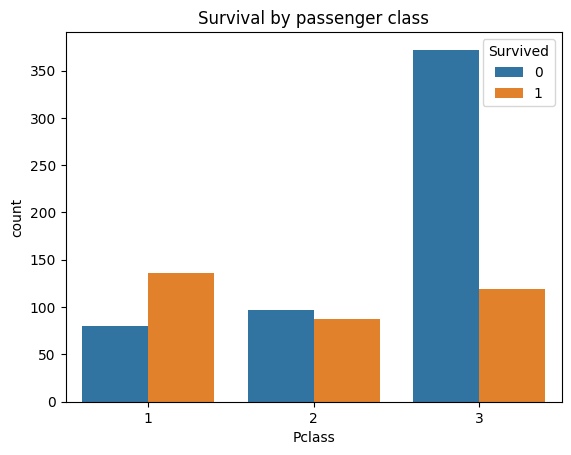

In [ ]:
#Graph Survival by passenger class
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Survival by passenger class")
plt.show()

**Fare vs Survival**

---



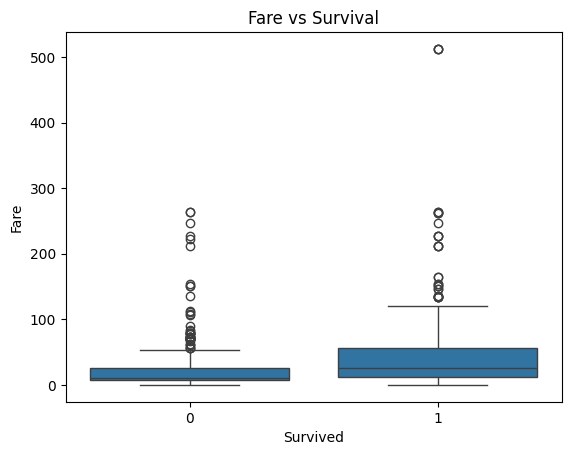

In [ ]:
#Fare vs Survival
sns.boxplot(x='Survived',y='Fare',data=df)
plt.title("Fare vs Survival")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [ ]:
X=df[["Pclass","Sex","Age","Parch","Fare","Embarked"]]
y=df[["Survived"]]

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2, random_state=42
)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
predicted=model.predict([[3,1,22,0,7.2500,2]])
print("survived(1) or not(0):",predicted[0])

survived(1) or not(0): 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Decision tree**

---



In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

X=df[["Pclass","Sex","Age","Parch","Fare","Embarked"]]
y=df[["Survived"]]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [ ]:
model=DecisionTreeClassifier(criterion="gini",max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred=model.predict(X_test)
print("Predicted:",y_pred)

Predicted: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Accuracy 0.7988826815642458


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred_rf= rf.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


**Model Evaluation**

---



In [ ]:
#Model Evaluation
def evaluation_model(y_test,y_pred):
  print("Accuracy:",accuracy_score(y_test,y_pred))
  print("Precision",precision_score(y_test,y_pred))
  print("Recall:",recall_score(y_test,y_pred))
  print("F1_score:",f1_score(y_test,y_pred))
  evaluate_model(y_test,y_pred)

**Confusion matrix graph**

---



In [ ]:
#confusion matrix graph
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
co=confusion_matrix(y_test,y_pred_rf)

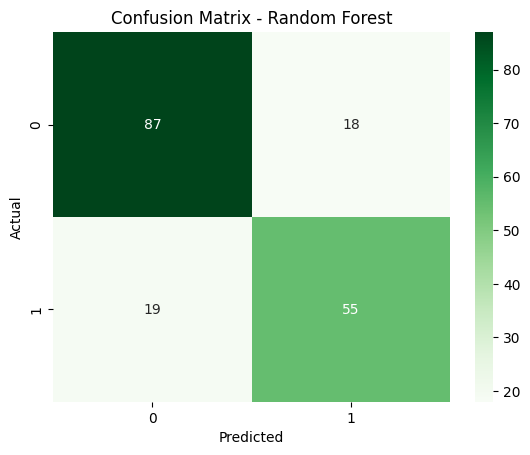

In [ ]:
sns.heatmap(co, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Classification report**

---



In [ ]:
#classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



**Features importance**

---



In [ ]:
#Features importance
importances=rf.feature_importances_
feature=X.columns

In [ ]:
feat_df = pd.DataFrame({
    'Feature': feature,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

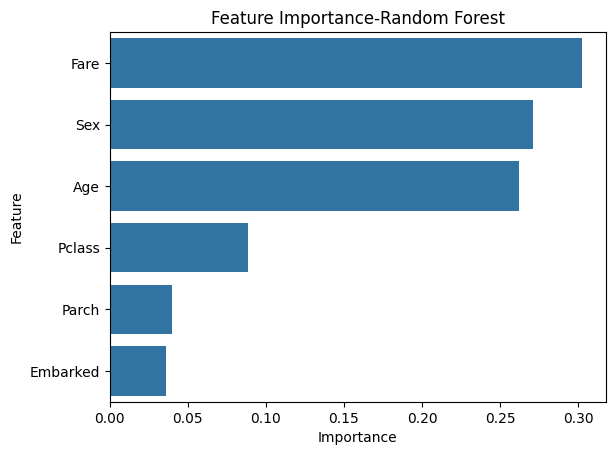

In [ ]:
sns.barplot(x='Importance',y='Feature',data=feat_df)
plt.title('Feature Importance-Random Forest')
plt.show()